In [133]:
import torch
import numpy as np
import random
import os
from torch import nn
from torch.autograd import Variable
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler as SS
%matplotlib inline

In [7]:
os.listdir(".")
dwc = pd.read_csv("cooling.csv", sep='\t')#data with cooling
dwoc = pd.read_csv("cooling_out.csv", sep='\t')#data wiithout cooling

In [8]:
dwc.head()

,Параметр размера распределения Росина- Раммлера. м,Параметр ширины распределения Росина - Раммлера,Диаметр представительных частиц. м,Скорость ввода завесного охлаждения. м/с,Осевая компонента скорости,Радиальная компонента скорости,Тангенциальная компонента скорости,Средний диаметр Заутера. м,Расходный комплекс. м/с,Давление. Па
0,0.000070,11.331890,0.000163,1.947487,3.106326,1.288388,2.237261,0.000069,1167.793,702494
1,0.000062,9.900000,0.000147,1.700000,2.850000,0.950000,2.460000,0.000061,1165.938,701378
2,0.000070,11.331890,0.000130,1.947487,2.593674,1.288388,2.237261,0.000069,1315.299,791227
3,0.000054,8.468109,0.000163,1.947487,2.593674,1.288388,2.682739,0.000053,1173.714,706056
4,0.000054,8.468109,0.000130,1.452513,2.593674,1.288388,2.682739,0.000053,1177.873,708558


In [9]:
names = [i for i in dwc]
x_names = names[:-2]
y_names = names[-2:]
data = dwc.as_matrix()
X = data[:, :8]
Y = data[:, -2:]
print X.shape, Y.shape

(160, 8) (160, 2)


In [109]:
Y.mean()

Variable containing:
 7.4954e+05
[torch.FloatTensor of size 1]

In [14]:
x_train.reshape(107, 1, 8).shape

(107, 1, 8)

In [126]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(8, 20),
            nn.Sigmoid(),
            nn.Linear(20, 40),
            nn.ReLU(),
            nn.Linear(40, 1)
        )
        
    def forward(self, x):
        return self.layers(x)
        

In [134]:
names = [i for i in dwc]
x_names = names[:-2]
y_names = names[-2:]
data = dwc.as_matrix()
X = data[:, :8]
Y = data[:, -1:]

ssx = SS()
Xs = ssx.fit_transform(X)

ssy = SS()
Ys = ssy.fit_transform(Y)

Y = Ys
X = Xs

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.33, random_state=42)
#x_train.reshape(107, 1, 8)
train_x = torch.from_numpy(train_x).type(torch.FloatTensor)
train_y = torch.from_numpy(train_y).type(torch.FloatTensor)
test_x = torch.from_numpy(test_x).type(torch.FloatTensor)
test_y = torch.from_numpy(test_y).type(torch.FloatTensor)

In [135]:
net = Net()
batch_size = 10
loss_fn = torch.nn.MSELoss()
net_opt = torch.optim.Adam(net.parameters(), lr=0.001)
L = []

Current loss: 0.00184336677194 epoch: 9980 iteration: 100                0.168319493532 epoch: 520 iteration: 30   iteration: 70     700 iteration: 40              1100 iteration: 50          1420 iteration: 60  0.219803333282 epoch: 1480 iteration: 90               100   epoch: 2060 iteration: 70  90      0.230955600739 epoch: 2300 iteration: 100         0.060023277998 epoch: 2600 iteration: 90       0.0433136224747 epoch: 2860 iteration: 90                         epoch: 3760 iteration: 100   0.00590823870152 epoch: 3880 iteration: 40       epoch: 4120 iteration: 0                   4760 iteration: 90   iteration: 90   epoch: 4920 iteration: 80         0.013783830218 epoch: 5200 iteration: 90               70               100                         30                  iteration: 80  0.00139711238444 epoch: 7940 iteration: 90   8040 iteration: 100 0.00415710126981 epoch: 8080 iteration: 40                                                 

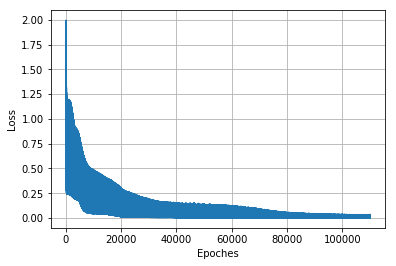

In [136]:
for i in xrange(10000):
    for j in xrange(0, len(train_x), batch_size):
        X = Variable(train_x[j:j + batch_size])
        Y = Variable(train_y[j:j + batch_size], requires_grad=False)

        out = net.forward(X)

        loss = loss_fn(out, Y)

        if i % 20 == 0:
            print '\r', 'Current loss:', loss.data[0], "epoch:", i, "iteration:", j, 
        L.append(loss.data[0])

        net.zero_grad()

        loss.backward()

        net_opt.step()

plt.plot(range(len(L)), L)
plt.grid()
plt.xlabel("Epoches")
plt.ylabel("Loss")
        

In [101]:
4515**2

20385225

In [137]:
a = net.forward(Variable(test_x))
np.corrcoef(a.data.numpy().T, test_y.numpy().T)

array([[ 1.       ,  0.1264691],
       [ 0.1264691,  1.       ]])

In [138]:
b = net.forward(Variable(train_x))
np.corrcoef(b.data.numpy().T, train_y.numpy().T)

array([[ 1.        ,  0.99886899],
       [ 0.99886899,  1.        ]])